In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import data
df = pd.read_csv('medical_examination.csv')
df.head(3)
#print(len(df)) # 70.000 rows

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [3]:
#df['overweight'] = df.apply(lambda x: 1 if (x.weight / ((x.height/100) **2)) >25 else 0,axis=1)
df['overweight'] = (df['weight'] / ((df['height'] / 100 ) **2)).apply(lambda x: 1 if x >25 else 0 )
df['cholesterol'] = df['cholesterol'].apply(lambda x: 1 if x >1  else 0)
df['gluc'] = df['gluc'].apply(lambda x: 1 if x >1  else 0)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


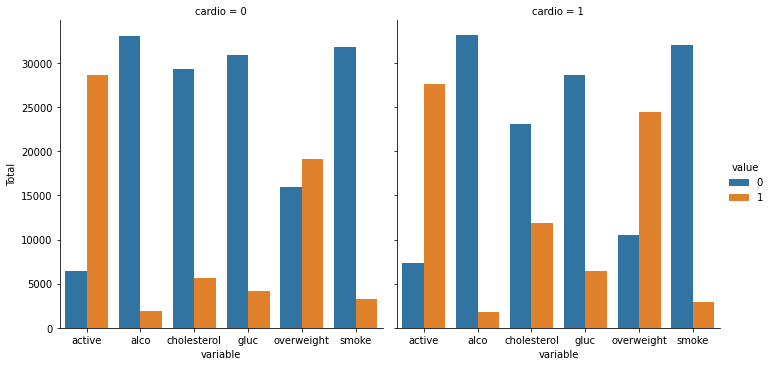

In [46]:


# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 
    #'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])

    #df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to 
    #rename one of the collumns for the catplot to work correctly.
    df_cat['Total']=1

    df_cat = df_cat.groupby(['cardio','variable','value'],as_index=False).count()

    # Draw the catplot with 'sns.catplot()'
    plt.close('all')
    fig=sns.catplot(data=df_cat,x='variable', y='Total',hue='value',kind='bar',col='cardio')
    plt.show()


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig
draw_cat_plot()


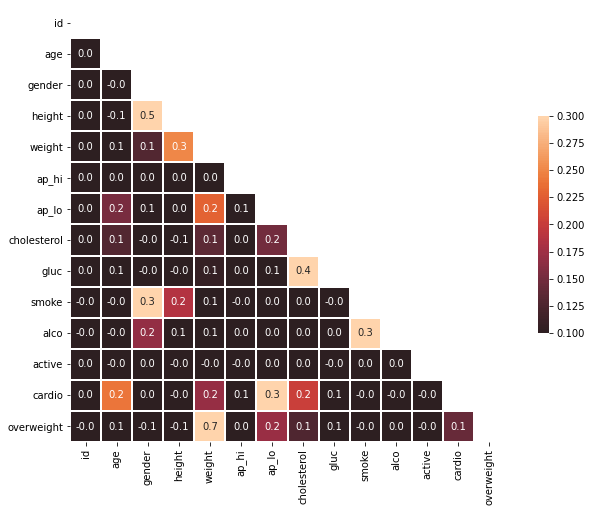

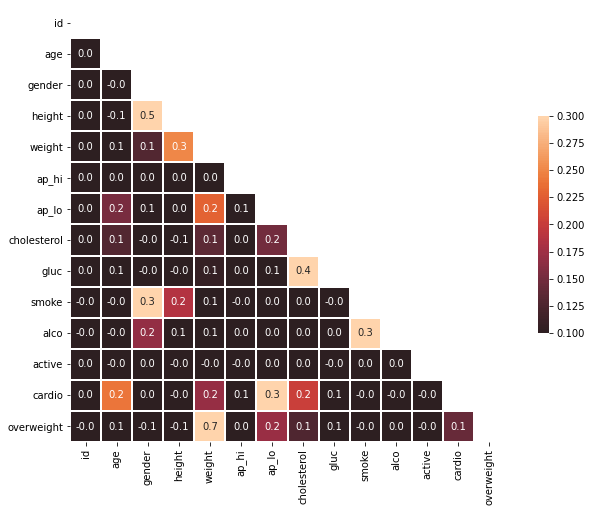

In [78]:

# Draw Heat Map
def draw_heat_map():
    # Clean the dat
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025))&
                 (df['height'] <= df['height'].quantile(0.975))&
                (df['weight'] >= df['weight'].quantile(0.025))&
                (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr(method='pearson')

    # Generate a mask for the upper triangle
    mask = np.triu(corr)
    

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 8))
   
    # Draw the heatmap with 'sns.heatmap()'

    ax = sns.heatmap(corr,linewidths=1,annot=True, square=True,mask=mask,fmt='.1f', vmax=.3,vmin=0.1,center=0.08, cbar_kws={'shrink':0.5} )


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig
draw_heat_map()